In [45]:
import pandas as pd
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

df = pd.read_csv("QueryResultsFinal.csv")

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [47]:
df = df.dropna()

In [48]:
df

,Title,Tags,Id,Score,ViewCount,AnswerCount,CreationDate,LastActivityDate,CommentCount,body_clean,main_tag,ActivityTime
0,How to convert Decimal to Double in C#?,"['c#', 'floating-point', 'type-conversion', 'd...",4,795,72107,13,2008-07-31 21:42:52,2022-09-08 05:07:26,4,want assign decimal variable double variable d...,c#,5151
1,Calculate relative time in C#,"['c#', 'datetime', 'time', 'datediff', 'relati...",11,1645,198982,41,2008-07-31 23:55:37,2022-09-05 11:26:30,3,given specific value display relative time lik...,c#,5148
2,Determine a user's timezone,"['html', 'browser', 'timezone', 'user-agent', ...",13,704,285740,27,2008-08-01 00:42:38,2022-03-29 07:31:31,10,standard way web server able determine user ti...,html,4988
3,How to use the C socket API in C++ on z/OS,"['c++', 'c', 'sockets', 'mainframe', 'zos']",25,175,15977,9,2008-08-01 12:13:50,2023-06-01 11:20:00,1,issue getting c socket work properly c althoug...,c++,5416
4,Decoding T-SQL CAST in C#/VB.NET,"['c#', 'sql', 'vb.net', 'ascii', 'hex']",109,68,6106,2,2008-08-01 15:23:05,2019-02-10 22:11:00,3,recently site deluged resurgence botnet inject...,c#,3845
...,...,...,...,...,...,...,...,...,...,...,...,...
66764,Bootstrap 4 - Nav - Hiding extra menu items,"['jquery', 'html', 'css', 'twitter-bootstrap',...",46477802,17,16932,7,2017-09-28 20:31:08,2019-03-17 11:49:07,4,bootstrap 4 layout similar many nav item want ...,html,534
66765,Check std::vector has duplicates,"['c++', 'algorithm', 'for-loop', 'vector', 'du...",46477764,19,51315,7,2017-09-28 20:27:39,2022-06-29 10:51:43,11,want check vector integer duplicate return tru...,c++,1734
66766,Python subprocess check_output decoding specia...,"['python', 'python-3.x', 'character-encoding',...",46476677,6,9223,1,2017-09-28 19:13:38,2017-09-28 19:34:10,9,issue python encoding try execute give output ...,python,0
66767,"In electron, how to upload a file from it's fu...","['javascript', 'node.js', 'file-upload', 'elec...",46476474,4,3954,1,2017-09-28 18:58:53,2018-06-27 13:57:05,3,electron app button say upload contract clicke...,javascript,271


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Extraction des fonctionnalités (features) à partir des phrases
vectorizer = CountVectorizer(vocabulary=mots_cles)
X = vectorizer.fit_transform(data['body_clean'])

# Labels correspondants
y = data['main_tag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition des hyperparamètres à tester pour la recherche en grille
param_grid = {'alpha': [0.1, 0.5, 1.0]}

# Entraînement du modèle de classification avec recherche en grille des hyperparamètres
model = MultinomialNB()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Affichage de l'accuracy
print('Accuracy:', accuracy)

# Rapport de classification
classification_report = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_report)

# Exemple d'une nouvelle phrase à classifier
nouvelle_phrase = 'I want to create a class in C#'

# Extraction des fonctionnalités (features) de la nouvelle phrase
nouvelle_phrase_features = vectorizer.transform([nouvelle_phrase])

# Classification de la nouvelle phrase avec le meilleur modèle
prediction = best_model.predict(nouvelle_phrase_features)

# Affichage de la prédiction
print('Phrase:', nouvelle_phrase)
print('Prédiction:', prediction)

Accuracy: 0.3160850681443762
Classification Report:
               precision    recall  f1-score   support

        .net       0.00      0.00      0.00       288
     android       0.65      0.23      0.34       872
          c#       0.22      0.97      0.35      2385
         c++       0.00      0.00      0.00      1593
        html       0.00      0.00      0.00       267
         ios       0.10      0.00      0.00       885
        java       0.87      0.36      0.51      2212
  javascript       0.06      0.01      0.02      2108
         php       0.00      0.00      0.00       744
      python       0.90      0.45      0.60      2000

    accuracy                           0.32     13354
   macro avg       0.28      0.20      0.18     13354
weighted avg       0.38      0.32      0.26     13354

Phrase: I want to create a class in C#
Prédiction: ['c#']


C:\Users\omira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Séparation des données en variables prédictives (X) et variable cible (y)
X = data['body_clean']
y = data['main_tag']

# Extraction des mots clés pré-définis
mots_cles = ['c#', 'java', 'javascript', 'python', 'c++', 'android', 'ios', '.net', 'html', 'php'] 

# Création du vecteur de caractéristiques en utilisant TF-IDF
vectorizer = TfidfVectorizer(vocabulary=mots_cles)

# Transformation du texte en vecteurs
X_vecteurs = vectorizer.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_vecteurs, y, test_size=0.2, random_state=42)

# Définition du modèle de classification (SVM)
model = SVC()

# Définition des hyperparamètres à rechercher avec GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}

# Recherche sur grille pour trouver les meilleurs paramètres
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction sur l'ensemble de test avec les meilleurs paramètres
y_pred = grid_search.predict(X_test)

# Évaluation des performances du modèle
accuracy = (y_pred == y_test).mean()
print("Précision :", accuracy)

Meilleurs paramètres : {'C': 10, 'gamma': 0.1}
Précision : 0.33592930957016626


In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df['body_clean'], df['main_tag'], test_size=0.2, random_state=42)

# Création d'un pipeline pour le traitement des données et la classification
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Paramètres pour la recherche de la meilleure configuration
parameters = {
    'tfidf__max_features': [500, 1000, 2000],
    'clf__C': [1, 10, 100]
}

# Recherche de la meilleure configuration avec GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Rapport de classification
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Exemple de prédiction avec une question donnée
question = "how can i create an api for android ?"
predicted_keywords = grid_search.predict([question])

print("\nExemple de prédiction :")
print(f"Question : {question}")
print(f"Mots-clés prédits : {predicted_keywords}")

C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Classification Report:
              precision    recall  f1-score   support

        .net       0.54      0.05      0.08       288
     android       0.72      0.63      0.67       872
          c#       0.64      0.77      0.70      2385
         c++       0.77      0.80      0.78      1593
        html       0.44      0.24      0.31       267
         ios       0.75      0.69      0.72       885
        java       0.77      0.73      0.75      2212
  javascript       0.71      0.74      0.72      2108
         php       0.59      0.50      0.54       744
      python       0.79      0.85      0.82      2000

    accuracy                           0.72     13354
   macro avg       0.67      0.60      0.61     13354
weighted avg       0.71      0.72      0.71     13354


Exemple de prédiction :
Question : how can i create an api for android ?
Mots-clés prédits : ['android']


In [51]:
import pickle
# Enregistrement du modèle dans un fichier pickle
filename = 'logistic_best.pickle'
pickle.dump(grid_search, open(filename, 'wb'))

In [ ]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(set(y_train))
    
    # Vectorisation TF-IDF
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(features)
    
    # Réduction de dimension avec T-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(X_tfidf.toarray())
    
    # Détermination des clusters à partir des données après T-SNE
    cls = KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    ARI = np.round(metrics.adjusted_rand_score(y_train, cls.labels_), 4)
    time2 = np.round(time.time() - time1, 0)
    
    print("ARI : ", ARI, "time : ", time2)
    return ARI, X_tsne, cls.labels_

# Visualisation du T-SNE selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_train, labels, ARI):
    l_cat = list(set(y_train))
    
    fig = plt.figure(figsize=(15, 6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=[l_cat.index(cat) for cat in y_train], cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Catégorie")
    plt.title('Représentation des mots-clés par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des mots-clés par clusters')
    
    plt.show()
    print("ARI : ", ARI)

ARI :  0.0378 time :  855.0


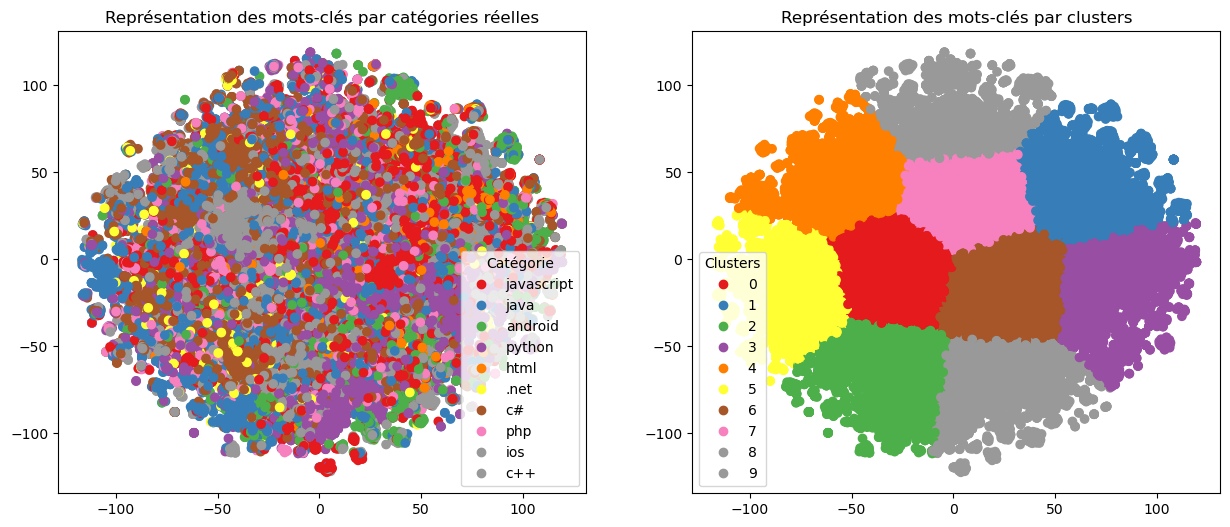

ARI :  0.0378


In [33]:
# Appel de la fonction ARI_fct pour calculer T-SNE, les clusters et l'ARI
ARI, X_tsne, labels = ARI_fct(X_train)

# Appel de la fonction TSNE_visu_fct pour visualiser les résultats
TSNE_visu_fct(X_tsne, y_train, labels, ARI)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Création du sac de mots
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['body_clean'])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, df['main_tag'], test_size=0.2, random_state=42)

# Définition de la grille des hyperparamètres
param_grid = {'alpha': [0.01, 0.1, 1.0]}

# Entraînement du classificateur bayésien naïf
clf = MultinomialNB()
# Recherche par grille pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres et meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres : ", best_params)
print("Meilleur score : {:.2f}%".format(best_score * 100))

# Prédiction sur l'ensemble de test avec les meilleurs hyperparamètres
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle : {:.2f}%".format(accuracy * 100))

# Rapport de classification
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Meilleurs hyperparamètres :  {'alpha': 1.0}
Meilleur score : 66.87%
Exactitude du modèle : 67.81%
Classification Report:
              precision    recall  f1-score   support

        .net       0.00      0.00      0.00       288
     android       0.71      0.59      0.64       872
          c#       0.58      0.78      0.67      2385
         c++       0.71      0.79      0.75      1593
        html       0.44      0.17      0.24       267
         ios       0.82      0.61      0.70       885
        java       0.77      0.64      0.70      2212
  javascript       0.63      0.74      0.68      2108
         php       0.60      0.43      0.50       744
      python       0.77      0.77      0.77      2000

    accuracy                           0.68     13354
   macro avg       0.60      0.55      0.56     13354
weighted avg       0.67      0.68      0.67     13354



In [53]:
# Enregistrement du modèle dans un fichier pickle
filename = 'multinomial_best.pickle'
pickle.dump(best_clf, open(filename, 'wb'))

In [39]:
df = pd.read_csv("QueryResultsFinalOther.csv")

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Création du sac de mots
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['title_preprocess'])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, df['main_tag'], test_size=0.2, random_state=42)

# Définition de la grille des hyperparamètres
param_grid = {'alpha': [0.01, 0.1, 1.0]}

# Entraînement du classificateur bayésien naïf
clf = MultinomialNB()
# Recherche par grille pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres et meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres : ", best_params)
print("Meilleur score : {:.2f}%".format(best_score * 100))

# Prédiction sur l'ensemble de test avec les meilleurs hyperparamètres
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle : {:.2f}%".format(accuracy * 100))

# Rapport de classification
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Meilleurs hyperparamètres :  {'alpha': 0.1}
Meilleur score : 54.13%
Exactitude du modèle : 54.60%
Classification Report:
                     precision    recall  f1-score   support

               .net       0.19      0.09      0.13       245
          algorithm       0.34      0.36      0.35       140
amazon-web-services       0.44      0.49      0.47        97
            android       0.60      0.67      0.63       876
            angular       0.53      0.38      0.44       178
             arrays       0.18      0.04      0.06        53
            asp.net       0.30      0.11      0.16       152
       asp.net-core       0.00      0.00      0.00        32
                  c       0.34      0.32      0.33       471
                 c#       0.57      0.64      0.60      2407
                c++       0.57      0.66      0.61      1560
                css       0.26      0.09      0.13       113
           database       0.00      0.00      0.00        62
             django     

C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Création du sac de mots
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['body_clean'])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, df['main_tag'], test_size=0.2, random_state=42)

# Définition de la grille des hyperparamètres
param_grid = {'alpha': [0.01, 0.1, 1.0]}

# Entraînement du classificateur bayésien naïf
clf = MultinomialNB()
# Recherche par grille pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres et meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres : ", best_params)
print("Meilleur score : {:.2f}%".format(best_score * 100))

# Prédiction sur l'ensemble de test avec les meilleurs hyperparamètres
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle : {:.2f}%".format(accuracy * 100))

# Rapport de classification
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Meilleurs hyperparamètres :  {'alpha': 1.0}
Meilleur score : 50.92%
Exactitude du modèle : 50.54%
Classification Report:
                     precision    recall  f1-score   support

               .net       0.16      0.14      0.15       245
          algorithm       0.41      0.69      0.51       140
amazon-web-services       0.63      0.43      0.51        97
            android       0.59      0.61      0.60       876
            angular       0.51      0.39      0.45       178
             arrays       0.00      0.00      0.00        53
            asp.net       0.26      0.07      0.11       152
       asp.net-core       0.00      0.00      0.00        32
                  c       0.39      0.40      0.39       471
                 c#       0.55      0.62      0.58      2407
                c++       0.53      0.67      0.59      1560
                css       0.14      0.01      0.02       113
           database       0.00      0.00      0.00        62
             django     

C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
